# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [77]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# Setting the current number of coins for each cryptocurrency asset held in portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# Monthly amount of the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# API call to access the current price of BTC using the Python requests library.
btc_response = requests.get(btc_url).json()

# Review the response data from the API call for BTC using the json.dumps and setting the indent and sort_keys parameters.
print(json.dumps(btc_response, sort_keys = True, indent = 4))

{
    "data": {
        "1": {
            "circulating_supply": 19028543,
            "id": 1,
            "last_updated": 1651490035,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 737650847769,
                    "percent_change_1h": -0.421220378848059,
                    "percent_change_24h": 1.68895547733695,
                    "percent_change_7d": -1.87519445099728,
                    "percentage_change_1h": -0.421220378848059,
                    "percentage_change_24h": 1.68895547733695,
                    "percentage_change_7d": -1.87519445099728,
                    "price": 38729.0,
                    "volume_24h": 25081303672
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19028543,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenc

In [7]:
# API call to access the current price ETH using the Python requests library.
eth_response = requests.get(eth_url).json()

# Review the response data from the API call for ETH using the json.dumps and setting the indent and sort_keys parameters.
print(json.dumps(eth_response, sort_keys = True, indent = 4))

{
    "data": {
        "1027": {
            "circulating_supply": 120615039,
            "id": 1027,
            "last_updated": 1651490040,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 338998502507,
                    "percent_change_1h": -0.376206574169537,
                    "percent_change_24h": 1.35210312141511,
                    "percent_change_7d": -3.94499264478019,
                    "percentage_change_1h": -0.376206574169537,
                    "percentage_change_24h": 1.35210312141511,
                    "percentage_change_7d": -3.94499264478019,
                    "price": 2807.59,
                    "volume_24h": 14242811094
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120615039,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [54]:
# Access the current price of BTC by parsing the selected response object.
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC.
print(f"The current price of BTC is ${btc_price: .2f}.")

The current price of BTC is $ 38729.00.


In [55]:
# Access the current price of ETH by parsing the selected response object.
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH.
print(f"The current price of ETH is ${eth_price: .2f}.")

The current price of ETH is $ 2807.59.


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [52]:
# Compute the current value of the BTC holding.
btc_value = btc_price * btc_coins

# Print current value of your holding in BTC.
print(f"The current value of BTC holding is ${btc_value: .2f}.")

The current value of BTC holding is $ 46474.80.


In [53]:
# Compute the current value of the ETH holding.
eth_value = eth_price * eth_coins

# Print current value of your holding in ETH.
print(f"The current value of ETH holding is ${eth_value: .2f}.")

The current value of ETH holding is $ 14880.23.


In [56]:
# Compute the total value of the cryptocurrency wallet adding the value of each asset.
total_crypto_wallet = eth_value + btc_value

# Print current cryptocurrency wallet balance.
print(f"The current cryptocurrency wallet balance is ${total_crypto_wallet: .2f}.")

The current cryptocurrency wallet balance is $ 61355.03.


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys.
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object.
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both bond(s) and stock(s) portion of the portfolio.
tickers = ["SPY", "AGG"]

# Set timeframe to 1Day.
timeframe = "1Day"

# Set both the start and end date at the date of desired weekday and format as ISO format.
start_date = pd.Timestamp("2022-04-22", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-04-22", tz="America/New_York").isoformat()

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio and format the response object as a DataFrame using `df` property after the function.
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame by separating the ticker data.
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2022-04-22 04:00:00+00:00  436.94  438.0825  425.44  426.04  132156403   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-04-22 04:00:00+00:00      972064  429.813156  102.73  103.18  102.67   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-04-22 04:00:00+00:00  102.94  9152665       31498  102.925863

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [57]:
# Access the closing price for AGG from the Alpaca DataFrame and convert the value to a floating point number.
agg_close_price = pd.DataFrame()

agg_close_price = prices_df["AGG"]["close"]
agg_close_price.index = agg_close_price.index.date

# Print the AGG closing price.
print(f"The AGG closing price is ${agg_close_price.iloc[0]}.")

The AGG closing price is $102.94.


In [58]:
# Access the closing price for SPY from the Alpaca DataFrame and convert the value to a floating point number.
spy_close_price = pd.DataFrame()

spy_close_price = prices_df["SPY"]["close"]
spy_close_price.index = spy_close_price.index.date

# Print the SPY closing price.
print(f"The SPY closing price is ${spy_close_price.iloc[0]}.")

The SPY closing price is $426.04.


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [60]:
# Calculating the current value of the bond portion of the portfolio.
agg_value = agg_close_price.iloc[0] * agg_shares

# Print the current value of the bond portfolio.
print(f"The current value of the bond portfolio is ${agg_value: .2f}.")

The current value of the bond portfolio is $ 20588.00.


In [66]:
# Calculating the current value of the stock portion of the portfolio.
spy_value = spy_close_price.iloc[0] * spy_shares

# Print the current value of the stock portfolio.
print(f"The current value of the stock portfolio is ${spy_value: .2f}.")

The current value of the stock portfolio is $ 46864.40.


In [67]:
# Calculating the total value of the stock and bond portion of the portfolio.
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio.
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds: .2f}.")

The current balance of the stock and bond portion of the portfolio is $ 67452.40.


In [68]:
# Calculating the total value of the entire savings portfolio combining stocks, bonds and crypto wallet.
total_portfolio = total_stocks_bonds + total_crypto_wallet

# Print current cryptocurrency wallet balance.
print(f"The current cryptocurrency wallet balance is ${total_portfolio: .2f}.")

The current cryptocurrency wallet balance is $ 128807.43.


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [72]:
# Consolidate financial assets data into a Python list
saving_data = (total_crypto_wallet, total_stocks_bonds)

# Review the Python list savings_data
print(f"saving_data tuple - {saving_data}")  

saving_data tuple - (61355.026999999995, 67452.4)


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [74]:
# Create a Pandas DataFrame called savings_df 
saving_df = pd.DataFrame(saving_data, columns = ["Amount"], index = ["crypto", "stock/bonds"])

# Display the savings_df DataFrame
display(saving_df)

,Amount
crypto,61355.027
stock/bonds,67452.400


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Composition of the Current Member’s Portfolio'}, ylabel='Amount'>

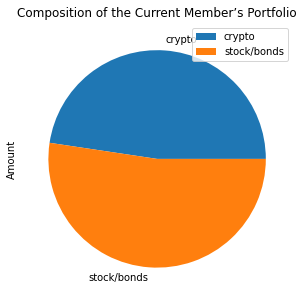

In [75]:
# Pie chart plot of the total portfolio value (crypto and stock/bond).
saving_df.plot.pie(figsize = (5,5), title = "Composition of the Current Member’s Portfolio", y = "Amount")

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [76]:
# Possibility of creating an emergency fund with 3 conditions:
if total_portfolio >= emergency_fund_value:
    print("Congratulation! You have enough money in this fund.")
elif total_portfolio == emergency_fund_value:
    print("Congratulation! You reached this important financial goal.")
else:
    print(f"You are ${total_portfolio - emergency_fund_value: .2f} from reaching the goal.")

Congratulation! You have enough money in this fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 3 years back from selected date.
start_date_3yr = pd.Timestamp("2019-04-22", tz="America/New_York").isoformat()
end_date_3yr = pd.Timestamp("2022-04-22", tz="America/New_York").isoformat()

In [29]:
# Use the Alpaca get_bars function to get  years worth of pricing data and format the response object as a DataFrame using `df` property after the function.
prices_3yr_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date_3yr,
    end = end_date_3yr,
).df

# Reorganize the DataFrame by separating by ticker data.
SPY = prices_3yr_df[prices_3yr_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = prices_3yr_df[prices_3yr_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames.
prices_3yr_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display both the first and last five rows of the DataFrame.
display(prices_3yr_df.head())
display(prices_3yr_df.tail())

SPY                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-04-22 04:00:00+00:00  289.17  290.435  289.0700  290.27  40520264   
2019-04-23 04:00:00+00:00  290.68  293.140  290.4200  292.88  52411775   
2019-04-24 04:00:00+00:00  292.76  293.160  292.0700  292.23  50469550   
2019-04-25 04:00:00+00:00  292.12  292.780  290.7300  292.05  57875137   
2019-04-26 04:00:00+00:00  292.12  293.490  291.2401  293.41  51449173   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-04-22 04:00:00+00:00      170767  290.002934  108.13  108.16  108.05   
2019-04-23 04:00:00+00:00      232023  292.102165  108.18  108.28  108.15   
2019-04-24 04:00:00+00:00      203858  292.580824  108.42  108.53  108.42   
2019-04-25 04:00:00+00:00      238260  292.051720  108.50  108.55  108.42   
2019-04-26 04:00:00+00:00      220594  292.642502  108.74  108.75  108.66   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-04-22 04:00:00+00:00  108.06  5725616        9161  108.098893  
2019-04-23 04:00:00+00:00  108.25  3422712       10779  108.236718  
2019-04-24 04:00:00+00:00  108.50  3000163       10192  108.496809  
2019-04-25 04:00:00+00:00  108.49  2648150        9121  108.473969  
2019-04-26 04:00:00+00:00  108.71  2300074        8664  108.705413

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2022-04-18 04:00:00+00:00  436.73  439.7500  435.61  437.97   65814949   
2022-04-19 04:00:00+00:00  437.87  445.8000  437.68  445.04   77678099   
2022-04-20 04:00:00+00:00  446.95  447.5700  443.48  444.71   64737457   
2022-04-21 04:00:00+00:00  448.58  450.0100  437.10  438.06   85097110   
2022-04-22 04:00:00+00:00  436.94  438.0825  425.44  426.04  132156403   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-04-18 04:00:00+00:00      573478  437.862483  103.97  104.0150  103.610   
2022-04-19 04:00:00+00:00      597840  443.072191  103.26  103.4264  102.974   
2022-04-20 04:00:00+00:00      591762  445.610168  103.36  103.7356  103.300   
2022-04-21 04:00:00+00:00      719682  442.772969  103.44  103.4700  102.790   
2022-04-22 04:00:00+00:00      972064  429.813156  102.73  103.1800  102.670   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-04-18 04:00:00+00:00  103.65   8630794       35583  103.732544  
2022-04-19 04:00:00+00:00  103.02   7845969       32656  103.193615  
2022-04-20 04:00:00+00:00  103.61   8434303       32866  103.528935  
2022-04-21 04:00:00+00:00  103.04  11393860       35595  103.047589  
2022-04-22 04:00:00+00:00  102.94   9152665       31498  102.925863

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Monte Carlo simulation with 30 years cumulative returns forecast with a 40% to AGG and 60% to SPY split and 500 samples.
MC_stock_bond_30yr = MCSimulation(
    portfolio_data = prices_3yr_df,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data.
MC_stock_bond_30yr.portfolio_data.head()

SPY                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-04-22 04:00:00+00:00  289.17  290.435  289.0700  290.27  40520264   
2019-04-23 04:00:00+00:00  290.68  293.140  290.4200  292.88  52411775   
2019-04-24 04:00:00+00:00  292.76  293.160  292.0700  292.23  50469550   
2019-04-25 04:00:00+00:00  292.12  292.780  290.7300  292.05  57875137   
2019-04-26 04:00:00+00:00  292.12  293.490  291.2401  293.41  51449173   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-22 04:00:00+00:00      170767  290.002934          NaN  108.13   
2019-04-23 04:00:00+00:00      232023  292.102165     0.008992  108.18   
2019-04-24 04:00:00+00:00      203858  292.580824    -0.002219  108.42   
2019-04-25 04:00:00+00:00      238260  292.051720    -0.000616  108.50   
2019-04-26 04:00:00+00:00      220594  292.642502     0.004657  108.74   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2019-04-22 04:00:00+00:00  108.16  108.05  108.06  5725616        9161   
2019-04-23 04:00:00+00:00  108.28  108.15  108.25  3422712       10779   
2019-04-24 04:00:00+00:00  108.53  108.42  108.50  3000163       10192   
2019-04-25 04:00:00+00:00  108.55  108.42  108.49  2648150        9121   
2019-04-26 04:00:00+00:00  108.75  108.66  108.71  2300074        8664   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-22 04:00:00+00:00  108.098893          NaN  
2019-04-23 04:00:00+00:00  108.236718     0.001758  
2019-04-24 04:00:00+00:00  108.496809     0.002309  
2019-04-25 04:00:00+00:00  108.473969    -0.000092  
2019-04-26 04:00:00+00:00  108.705413     0.002028

In [78]:
# Run the 30 years cumulative returns forecast Monte Carlo simulation.
MC_stock_bond_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991985,1.008000,0.987650,0.978320,1.001135,1.005022,0.998423,0.988746,1.015574,1.009270,...,0.994417,0.999104,0.994639,0.998893,0.994493,0.999953,0.996730,0.993352,1.003275,1.012034
2,0.989535,0.997181,0.988902,0.974771,0.996734,1.006688,0.974932,0.974021,1.020909,1.010334,...,0.995516,0.999604,0.976994,1.005340,0.988750,1.003448,0.990878,1.011862,1.006025,1.005143
3,0.986088,0.982495,0.995739,0.988443,0.990909,1.001165,0.981091,0.965439,1.036621,1.012102,...,0.996032,1.009358,0.988602,0.989206,0.978835,1.006707,0.991256,1.025659,0.991366,1.012875
4,0.983648,0.974411,0.992856,0.977656,0.976409,1.004641,0.970240,0.977587,1.047311,1.004511,...,0.989672,1.001683,0.978531,0.994211,0.982640,1.007478,0.996878,1.024412,0.997891,1.002493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.593448,2.812653,6.079602,1.735010,4.848421,18.288645,26.604588,8.016237,37.480008,10.045957,...,11.381840,10.484979,12.836575,6.500696,18.374164,5.241451,9.381979,4.689701,21.684939,7.803274
7557,8.706480,2.826389,6.076553,1.733883,4.868907,18.083326,26.641272,7.900760,37.685406,9.923132,...,11.266580,10.543069,12.775674,6.437143,18.309063,5.266653,9.232177,4.622839,21.602037,7.886971
7558,8.740650,2.827679,6.057133,1.730656,4.900938,18.010248,26.867619,7.794040,37.464356,9.808158,...,11.321711,10.548526,12.684626,6.413821,18.380233,5.177519,9.257461,4.716745,21.684763,7.880662
7559,8.716684,2.821648,5.985173,1.747116,4.946806,17.911968,26.580450,7.765417,37.032272,9.816242,...,11.263815,10.520169,12.758149,6.402343,18.005712,5.204173,9.193301,4.690662,21.345922,7.843277


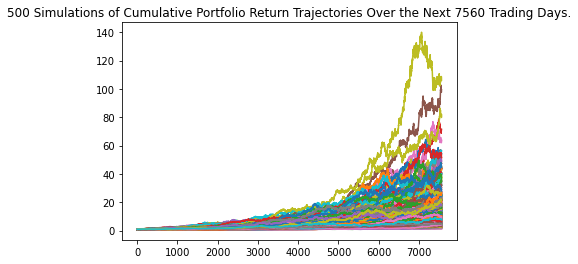

In [79]:
# Overlay line plot to visualize the 30-year Monte Carlo simulation.
stock_bond_30yr_weight_line_plot = MC_stock_bond_30yr.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

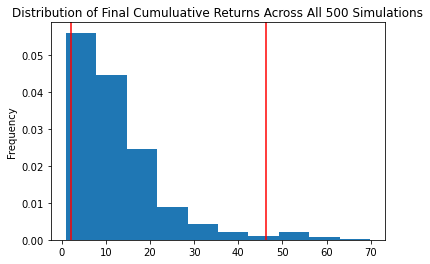

In [33]:
# Histogram plot to visualize the 30-year Monte Carlo simulation probability distribution.
stock_bond_30yr_weight_distribution_plot = MC_stock_bond_30yr.plot_distribution()

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [80]:
# Summary statistics from the 30-year Monte Carlo simulation results stored in variable.
stock_bond_30yr_weight_table = MC_stock_bond_30yr.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics.
print(stock_bond_30yr_weight_table)

count           500.000000
mean             13.966961
std              12.435920
min               1.325384
25%               6.387061
50%              10.396646
75%              17.470489
max             106.184420
95% CI Lower      2.540117
95% CI Upper     44.859835
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [81]:
# Print the current balance of the stock and bond portion of the members portfolio.
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds: .2f}.")

The current balance of the stock and bond portion of the portfolio is $ 67452.40.


In [94]:
# Range calculation of the possible 30-year outcomes for the current stock/bond portfolio using the lower and upper `95%` confidence intervals.
ci_lower_30yr_cumulative_return = round(stock_bond_30yr_weight_table[8]*total_stocks_bonds,2)
ci_upper_30yr_cumulative_return = round(stock_bond_30yr_weight_table[9]*total_stocks_bonds,2)

# Print the result of your calculations.
print(f"The possible outcomes are for the lower ${ci_lower_30yr_cumulative_return} and, for the higher ${ci_upper_30yr_cumulative_return}")

The possible outcomes are for the lower $171336.99 and, for the higher $3025903.51


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [85]:
# Monte Carlo simulation with 10 years cumulative returns forecast with a 20% to AGG and 80% to SPY split and 500 samples.
MC_stock_bond_10yr = MCSimulation(
    portfolio_data = prices_3yr_df,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data.
display(MC_stock_bond_10yr.portfolio_data.head())
display(MC_stock_bond_10yr.portfolio_data.tail())

SPY                                       \
                             open     high       low   close    volume   
timestamp                                                                
2019-04-22 04:00:00+00:00  289.17  290.435  289.0700  290.27  40520264   
2019-04-23 04:00:00+00:00  290.68  293.140  290.4200  292.88  52411775   
2019-04-24 04:00:00+00:00  292.76  293.160  292.0700  292.23  50469550   
2019-04-25 04:00:00+00:00  292.12  292.780  290.7300  292.05  57875137   
2019-04-26 04:00:00+00:00  292.12  293.490  291.2401  293.41  51449173   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-04-22 04:00:00+00:00      170767  290.002934          NaN  108.13   
2019-04-23 04:00:00+00:00      232023  292.102165     0.008992  108.18   
2019-04-24 04:00:00+00:00      203858  292.580824    -0.002219  108.42   
2019-04-25 04:00:00+00:00      238260  292.051720    -0.000616  108.50   
2019-04-26 04:00:00+00:00      220594  292.642502     0.004657  108.74   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2019-04-22 04:00:00+00:00  108.16  108.05  108.06  5725616        9161   
2019-04-23 04:00:00+00:00  108.28  108.15  108.25  3422712       10779   
2019-04-24 04:00:00+00:00  108.53  108.42  108.50  3000163       10192   
2019-04-25 04:00:00+00:00  108.55  108.42  108.49  2648150        9121   
2019-04-26 04:00:00+00:00  108.75  108.66  108.71  2300074        8664   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-04-22 04:00:00+00:00  108.098893          NaN  
2019-04-23 04:00:00+00:00  108.236718     0.001758  
2019-04-24 04:00:00+00:00  108.496809     0.002309  
2019-04-25 04:00:00+00:00  108.473969    -0.000092  
2019-04-26 04:00:00+00:00  108.705413     0.002028

SPY                                       \
                             open      high     low   close     volume   
timestamp                                                                
2022-04-18 04:00:00+00:00  436.73  439.7500  435.61  437.97   65814949   
2022-04-19 04:00:00+00:00  437.87  445.8000  437.68  445.04   77678099   
2022-04-20 04:00:00+00:00  446.95  447.5700  443.48  444.71   64737457   
2022-04-21 04:00:00+00:00  448.58  450.0100  437.10  438.06   85097110   
2022-04-22 04:00:00+00:00  436.94  438.0825  425.44  426.04  132156403   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2022-04-18 04:00:00+00:00      573478  437.862483     0.000411  103.97   
2022-04-19 04:00:00+00:00      597840  443.072191     0.016143  103.26   
2022-04-20 04:00:00+00:00      591762  445.610168    -0.000742  103.36   
2022-04-21 04:00:00+00:00      719682  442.772969    -0.014954  103.44   
2022-04-22 04:00:00+00:00      972064  429.813156    -0.027439  102.73   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2022-04-18 04:00:00+00:00  104.0150  103.610  103.65   8630794       35583   
2022-04-19 04:00:00+00:00  103.4264  102.974  103.02   7845969       32656   
2022-04-20 04:00:00+00:00  103.7356  103.300  103.61   8434303       32866   
2022-04-21 04:00:00+00:00  103.4700  102.790  103.04  11393860       35595   
2022-04-22 04:00:00+00:00  103.1800  102.670  102.94   9152665       31498   

                                                    
                                 vwap daily_return  
timestamp                                           
2022-04-18 04:00:00+00:00  103.732544    -0.003078  
2022-04-19 04:00:00+00:00  103.193615    -0.006078  
2022-04-20 04:00:00+00:00  103.528935     0.005727  
2022-04-21 04:00:00+00:00  103.047589    -0.005501  
2022-04-22 04:00:00+00:00  102.925863    -0.000970

In [86]:
# Run the 10 years cumulative returns forecast Monte Carlo simulation.
MC_stock_bond_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994015,1.000739,1.001426,0.995421,0.994189,1.014433,1.015809,0.988525,1.012698,0.999764,...,1.013346,0.988917,1.006766,1.020215,0.990409,0.984794,1.018638,0.995866,1.024678,1.016888
2,1.006836,1.001841,0.991299,1.000784,0.979253,1.012410,1.022141,0.990934,1.021763,0.992097,...,1.012387,0.990705,0.995386,1.030434,0.992569,0.981627,1.033130,1.002419,1.033391,1.017744
3,1.003527,1.015993,0.968113,0.998964,0.973587,1.001198,1.021296,1.006190,1.020010,1.009917,...,1.003848,0.979258,0.995763,1.047631,0.975591,0.999103,1.019410,0.992356,1.041272,1.014459
4,1.005499,1.014625,0.966335,1.002017,0.937033,1.037996,1.019002,0.994455,1.026178,1.013966,...,0.996218,0.988696,1.004774,1.056789,0.974184,1.015394,1.006659,1.001710,1.052486,1.010969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.409691,1.318258,3.910058,9.233716,2.025932,1.950261,1.978033,1.623950,5.716326,3.083546,...,0.656004,3.119167,3.114004,1.190474,1.240636,1.558438,3.422501,5.648474,2.072077,2.159837
2517,1.402389,1.331780,3.983550,9.300351,2.045261,1.966041,2.011830,1.612804,5.706688,3.075230,...,0.662824,3.102140,3.155257,1.196546,1.248488,1.545797,3.499604,5.663061,2.083893,2.163728
2518,1.417647,1.331050,4.022642,9.385348,2.029726,1.961715,2.020980,1.644877,5.694458,3.019574,...,0.662262,3.052735,3.174053,1.215099,1.251628,1.543441,3.465148,5.614381,2.075639,2.124448
2519,1.449109,1.334068,4.029893,9.350023,2.037420,1.970831,2.047939,1.627187,5.656234,2.983983,...,0.654931,3.059533,3.232677,1.187965,1.245921,1.524678,3.463055,5.578089,2.069197,2.079284


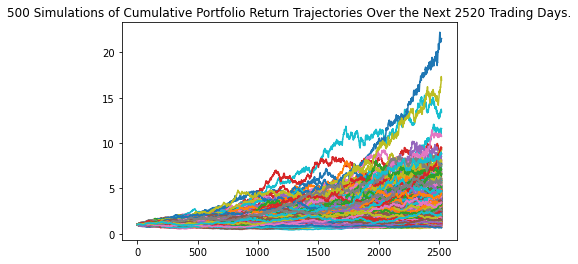

In [87]:
# Overlay line plot to visualize the 10-year Monte Carlo simulation.
stock_bond_10yr_line_plot = MC_stock_bond_10yr.plot_simulation()

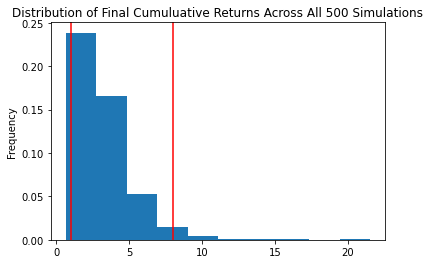

In [88]:
# Histogram plot to visualize the 10-year Monte Carlo simulation probability distribution.
stock_bond_10yr_dist_plot = MC_stock_bond_10yr.plot_distribution()

In [91]:
# Summary statistics from the 10-year Monte Carlo simulation results stored in variable.
stock_bound_10yr_table = MC_stock_bond_10yr.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics.
print(stock_bound_10yr_table)

count           500.000000
mean              3.251398
std               2.068331
min               0.648801
25%               1.960891
50%               2.744206
75%               4.027049
max              21.522214
95% CI Lower      1.006165
95% CI Upper      8.019382
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [92]:
# Print the current balance of the stock and bond portion of the members portfolio.
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds: .2f}.")

The current balance of the stock and bond portion of the portfolio is $ 67452.40.


In [93]:
# Range calculation of the possible 10-year outcomes for the current stock/bond portfolio using the lower and upper `95%` confidence intervals.
ci_lower_10yr_cumulative_return = round(stock_bound_10yr_table[8]*total_stocks_bonds,2)
ci_upper_10yr_cumulative_return = round(stock_bound_10yr_table[9]*total_stocks_bonds,2)

# Print the result of your calculations
print(f"The possible outcomes are for the lower ${ci_lower_10yr_cumulative_return} and, for the higher ${ci_upper_10yr_cumulative_return}")

The possible outcomes are for the lower $67868.25 and, for the higher $540926.56


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?